In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import t
from sklearn.linear_model import LinearRegression



In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/simple_linear_regression.csv", header = None)
data.head()

,0,1
0,-15.000,-555.482
1,-14.824,-388.301
2,-14.648,-317.445
3,-14.472,-412.942
4,-14.296,-310.663


In [4]:
# Retrieve data as a numpy array
x = data[[0]].values
Y = data[[1]].values
print(Y.shape)
Y[:5]

(200, 1)


array([[-555.482],
       [-388.301],
       [-317.445],
       [-412.942],
       [-310.663]])

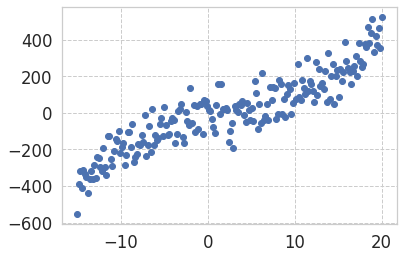

In [5]:
plt.scatter(x, Y)

### Simple linear regression

In [30]:
X = np.append(np.ones(shape=(data.shape[0], 1)), x, axis=1)
#print(X.shape)

# Calculates coefficients
betas = np.linalg.inv(X.T @ X) @ X.T @ Y
b0 = betas[0]
b1 = betas[1]
print("Q1.1: \nB0 = %f, B1 = %f" %(b0, b1))

# Calculates the standard error
Y_hat = X @ betas
residual = Y - Y_hat
rse = residual.T @ residual
var = np.var(residual, ddof = X.shape[1])
print("\nQ1.2:")
ses = []
var_b_hat = np.linalg.inv(X.T @ X) * var
for p_ in range(X.shape[1]):
    standard_error = var_b_hat[p_, p_] ** 0.5
    ses.append(standard_error)
    print(f"SE(B{p_}): {standard_error}")

low = b1 - 1.96*ses[1]
up = b1 + 1.96*ses[1]
print("\nQ1.3: \nB1 confidence interval = [%f, %f], so it is significantly different from zero" %(low, up))

r2 = np.power(Y_hat - np.mean(Y), 2).sum() / np.power(Y - np.mean(Y), 2).sum()
print("\nQ1.4: \nR2 = %f" %r2)

x_new = 10
y10 = b0 + b1*x_new
delta = np.sqrt(var) * np.sqrt(1 / X.shape[0] + (x_new - np.mean(X[:, 1]))**2 / np.sum((X[:, 1] - np.mean(X[:, 1]))**2))  
multiplier = 1.96
print("\nQ1.5:\ny_hat = %f when x = 10\nwith CI = [%f, %f]" %(y10, y10 - multiplier * delta, y10 + multiplier * delta))

Q1.1: 
B0 = -35.333034, B1 = 18.224081

Q1.2:
SE(B0): 6.29997241558134
SE(B1): 0.6024366925264293

Q1.3: 
B1 confidence interval = [17.043306, 19.404857], so it is significantly different from zero

Q1.4: 
R2 = 0.822118

Q1.5:
y_hat = 146.907781 when x = 10
with CI = [132.001965, 161.813597]


### Multiple linear regression

In [34]:
X2 = data[[0]].values
sqr = np.square(X2)
X2 = np.append(np.ones((X2.shape[0], 1)), X2, axis=1)
X2 = np.append(X2, sqr, axis=1)

# Calculates coefficients
betas = np.linalg.inv(X2.T @ X2) @ X2.T @ Y
b0 = betas[0]
b1 = betas[1]
b2 = betas[2]
print("Q2.1: \nB0 = %f, B1 = %f, B2 = %f" %(b0, b1, b2))

Y_hat = X2 @ betas
residual = Y - Y_hat
rse = residual.T @ residual
var = np.var(residual, ddof = X2.shape[1])
print("\nQ2.2:")
ses = []
var_b_hat = np.linalg.inv(X2.T @ X2) * var
for p_ in range(X2.shape[1]):
    standard_error = var_b_hat[p_, p_] ** 0.5
    ses.append(standard_error)
    print(f"SE(B{p_}): {standard_error}")

l2 = b2 - 1.96*ses[2]
u2 = b2 + 1.96*ses[2]

l1 = b1 - 1.96*ses[1]
u1 = b1 + 1.96*ses[1]
print("\nQ2.3: \nB2 CI = [%f, %f], so it is not significantly different from zero\nB1 CI = [%f, %f], so it is significantly different from zero" %(l2, u2, l1, u1))

r2 = np.power(Y_hat - np.mean(Y), 2).sum() / np.power(Y - np.mean(Y), 2).sum()
print("\nQ2.4: \nR2 = %f" %r2)

Q2.1: 
B0 = -37.052057, B1 = 18.135343, B2 = 0.017748

Q2.2:
SE(B0): 9.019552445685017
SE(B1): 0.6893210401041573
SE(B2): 0.06649003556322779

Q2.3: 
B2 CI = [-0.112573, 0.148068], so it is not significantly different from zero
B1 CI = [16.784274, 19.486412], so it is significantly different from zero

Q2.4: 
R2 = 0.822183
